In [2]:
#import stuff!
import numpy as np
from scipy.stats import chisquare
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

<b>Theory<b>

In [3]:
#Setting up Constants
j = (-1)**(1/2)
R0 = 10020 #Voltage-Setting Resistor [Ohms]
R1 = 197.7 #Parallel Resistor [Ohms]
R2 = 20.0 #Series Resistor [Ohms]
C = 0.000238 #Capacitor [Farads]
V0_in = 0.707 #Voltage In [V]

#creating shorthands
R = R2/(R1+R2) #Based on equivalent resistance (unitless)
I0 = V0_in/R0 #I calculated from VAC [A]
wc = 1/((R1+R2)*C) #shorthand frequency constant [rad/s]

#Creating Arrays
f0 = [i/10 for i in range(8000)] #Creating a range of (linear) frequencies [Hz]

w0 = []
i = 0
while i < len(f0):
    w0.append(2*np.pi*f0[i])
    i += 1

In [4]:
#Running Loops for Functions


#Impedance Function.
#Commented out because it is expressed always in terms of Real or Imaginary parts.

#Z = []
#for i in w:
#    Z.append(R1*(1+i**2*R2(R1+R2)-j*i*C*R1)/(1+i*2*C**2*(R1+R2)**2))
    
#Real(Z)
ReZ = []
for i in w0:
    ReZ.append(R1*(1+i**2*C**2*R2*(R1+R2))/(1+i**2*C**2*(R1+R2)**2))

#Imaginary(Z)
ImZ = []
for i in w0:
    ImZ.append(-R1*i*C*R1/(1+i**2*C**2*(R1+R2)**2))
    
#Phase
Ph = []
i = 0
while i < len(ImZ):
    Ph.append(np.arctan(ImZ[i]/ReZ[i]))
    i += 1

#|Z|
i = 0
MagZ = []
while i < len(ImZ):
    MagZ.append((ReZ[i]**2+ImZ[i]**2)**(1/2))
    i += 1

#Voltage
V0 = []
for i in MagZ:
    V0.append(I0*i)

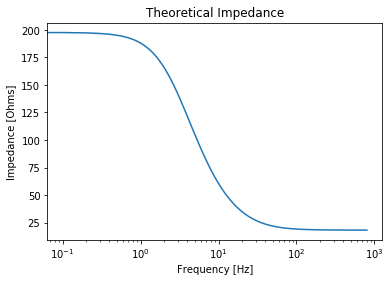

In [5]:
#Impedance Theory

plt.plot(f0,MagZ)
#plt.axis([0,100,0,200])
plt.xlabel('Frequency [Hz]')
plt.ylabel('Impedance [Ohms]')
plt.title('Theoretical Impedance')
plt.xscale('log')
plt.show()

<b>Data<b>

In [6]:
#Set up data. Keep data all in the same order! Also, make sure units are converted to SI first.

#frequency - kHz, must be converted
f_kHz = [96, 268, 630, 995, 1720, 2114, 2665, 3193, 3570, 4460, 5047, 6195, 7531, 8357, 9258, 12430, 20745, 30710, 47920, 61646, 78095]
#V_0rms - mV, must be converted
V_mV = [14.22, 14.16, 13.95, 13.56, 12.47, 11.81, 10.88, 10.05, 9.48, 8.32, 7.65, 6.60, 5.67, 5.22, 4.8, 3.78, 2.58, 2.08, 1.8, 1.77, 1.81]
#phase - Degrees, must be converted
P_deg = [-1.3,-3.8,-9.9,-15.1,-24.3,-28.7,-33.8,-37.8,-40.2,-44.3,-46.3,-48.5,-49.8,-49.8,-49.7,-47.7,-37.5,-24.6,-6.2,+5.5,+16.1]

P = [] #Phase in radians
for n in P_deg:
    P.append(2*np.pi*n/360)
    
V = [] #Voltage in Volts
for n in V_mV:
    V.append(n*10**-3)
    
P_inv = [] #negative of phase
for n in P:
    P_inv.append(-n)
    
f = []
for n in f_kHz:
    f.append(n/1000)

<b>Curve Fitting<b>

In [7]:
### Create Curve Fit

def func(f,R0f,R1f,R2f,Cf):
    return (V0_in/R0f)*R1f*(((1+(2*np.pi*f)**2*Cf**2*R2f*(R1f+R2f))**2+(2*np.pi*f*Cf)**2)**(1/2))/(1+(2*np.pi*f)**2*Cf**2*(R1f+R2f)**2)

popt, pcov = curve_fit(func,f,V)
print(popt)

### Plotting - Voltage vs Frequency

x = freq
y = [func(i,popt[0],popt[1],popt[2],popt[3]) for i in freq]

fig, sp = plt.subplots()

plt.title('Voltage vs. Frequency')
sp.plot(f,V,'bo',label='Data')
#sp.plot(f0,V0,'--',label='Theory') #uncomment to view theory
#sp.plot(w0,V0,'r--',label='Theory (Angular)') #uncomment to check angular vs linear
#sp.plot(f,func(f,*parameter),'-',label='Fit') #uncomment when curve fit is fixed.
legend = sp.legend(loc='upper right')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Voltage [V]')
plt.xscale('log')


plt.show()

[-139.64558599   -1.7474466   -12.29023508 -180.88587252]


NameError: name 'freq' is not defined

C:\Anaconda\lib\site-packages\scipy\optimize\minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


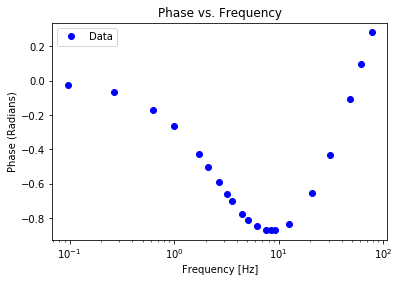

In [8]:
#Create Curve Fit

def func(f,R0f,R1f,R2f,Cf):
    return np.arctan(-2*np.pi*f*Cf/(1+(2*np.pi*f)**2*Cf**2*(R1f+R2f)**2))
popt, pcov = curve_fit(func,f,P)
parameter, covariance_matrix = curve_fit(func,f,P)

#Plotting - Phase vs Frequency

fig, sp = plt.subplots()

plt.title('Phase vs. Frequency')
sp.plot(f,P,'bo',label='Data')
#sp.plot(f0,Ph,'--',label='Theory') #uncomment to view theory
#sp.plot(w0,Ph,'r--',label='Theory (Angular)') #uncomment to check for angular vs linear
#sp.plot(f,func(f,*parameter),'-',label='Fit') #uncomment when curve fit is working
legend = sp.legend(loc='upper left')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Phase (Radians)')
plt.xscale('log')

plt.show()

<b>Theory vs. Data</b>

In [9]:
#Running Loops for Expected values - we will need these for chi squared.
#These are based on theory, not on curve fitting.
    
#Real(Z)
ReZ_exp = []
for n in f:
    ReZ_exp.append(R1*(1+(2*np.pi*n)**2*C**2*R2*(R1+R2))/(1+(2*np.pi*n)**2*C**2*(R1+R2)**2))

#Imaginary(Z)
ImZ_exp = []
for n in f:
    ImZ_exp.append(-R1*(2*np.pi*n)*C*R1/(1+(2*np.pi*n)**2*C**2*(R1+R2)**2))
    
#Phase
P_exp = []
i = 0
while i < len(ImZ_exp):
    P_exp.append(np.arctan(ImZ_exp[i]/ReZ_exp[i]))
    i += 1

#|Z|
i = 0
MagZ_exp = []
while i < len(ImZ_exp):
    MagZ_exp.append((ReZ_exp[i]**2+ImZ_exp[i]**2)**(1/2))
    i += 1

#Voltage
V_exp = []
for n in MagZ_exp:
    V_exp.append(I0*n)

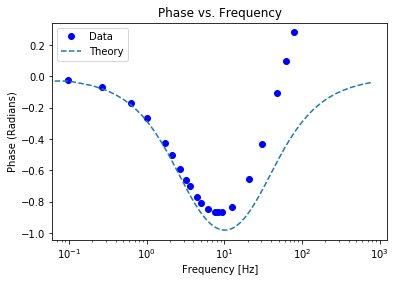

Standard Deviation:
0.05314224901459896


In [22]:
#Plotting - Phase vs Frequency

fig, sp = plt.subplots()

plt.title('Phase vs. Frequency')
sp.plot(f,P,'bo',label='Data')
sp.plot(f0,Ph,'--',label='Theory')
#sp.plot(f,P_exp) #checking that expected value calculations are correct.
legend = sp.legend(loc='upper left')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Phase (Radians)')
plt.xscale('log')

plt.show()

#standard deviation calculation

difP = []
i = 0
while i < len(P):
    difP.append((P[i]-P_exp[i])**2)
    i += 1

sP = 0
for n in difP:
    sP += n

print('Standard Deviation:')
print(sP/len(difP))

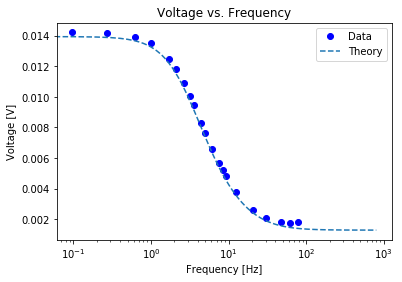

Standard Deviation:
8.25879219203454e-08


In [25]:
#plotting - Voltage vs Frequency

fig, sp = plt.subplots()

plt.title('Voltage vs. Frequency')
sp.plot(f,V,'bo',label='Data')
sp.plot(f0,V0,'--',label='Theory')
#sp.plot(f,V_exp) #checking that expected value calculations are correct
legend = sp.legend(loc='upper right')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Voltage [V]')
plt.xscale('log')

plt.show()

chisquare(V,V_exp)

#standard deviation calculation

difV = []
i = 0
while i < len(V):
    difV.append((V[i]-V_exp[i])**2)
    i += 1

sV = 0
for n in difV:
    sV += n
    
print('Standard Deviation:')
print(sV/len(V))